## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy.matlib
import mat73
import colorcet as cc

from numpy import asarray
from scipy import stats, signal, io
from scipy.ndimage import median_filter as medfilt
from matplotlib import ticker

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error as mse, explained_variance_score as exvar
from sklearn.utils.extmath import randomized_svd as rsvd

from utils import tic, toc, generate_color_gradient

from nilearn.plotting.cm import _cmap_d as nilearn_cmaps
cold_hot = nilearn_cmaps['cold_hot']

%matplotlib inline

In [2]:
font = {'family' : 'arial',
        'size'   : 16}
plt.rc('font', **font)

In [3]:
def plot_allen(ax):
    allen_ccf = mat73.loadmat(data_dir + '/allen_ccf_overlay.mat')['allen_ccf']
    for i in range(len(allen_ccf)):
        temp1 = allen_ccf[i]
        ax.plot(temp1[:,0],temp1[:,1],'w',lw=.5)

## Load and preprocess data

In [4]:
data_dir = '/home/ryanr/widefield'
outdir = '/home/ryanr/Allen/arousal_final/model_predictions'
figdir = '/home/ryanr/Allen/arousal_final/figs'
mask = io.loadmat(data_dir+'/newmask.mat')
mask = mask["newmask"]
mask.dtype = bool
mask_long = mask.reshape(16384,order='F')
allen_ccf = mat73.loadmat(data_dir + '/allen_ccf_overlay.mat')['allen_ccf']

In [5]:
from numpy.random import seed
seed(1)

## Analysis

In [6]:
## Set modeling parameters

subjects = [4,5,6,7,8,9,10]
delay = 1 # implement delay embedding? 0 or 1
nonlinear = 1 # use nonlinear mappings (VAE) (as opposed to linear regression) ? 0 or 1
Fs = 20 # sampling frequency
dt = 1/Fs
stackmax = 100 # Hankel row dimension (i.e., number of time shifts)
spacing = 3 # number of samples separating each row
r = 10 # number of modes of the Hankel matrix to keep (used for projection onto top r Legendre polynomials)

## Total variance explained

In [7]:
modality = 'jrgeco'

In [8]:
scores = np.zeros([len(subjects),4])

for s in range(len(subjects)):
    
    subj = subjects[s]
    
    ytest = np.load(outdir + '/' + str(subj) + '_' + modality + '_ytest.npy')
    
    ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_nodelay_lin_ytest_hat.npy')
    scores[s,0] = r2_score(ytest, ytest_hat, multioutput = 'variance_weighted')
    
    ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_nodelay_nonlin_ytest_hat.npy')
    scores[s,1] = r2_score(ytest, ytest_hat, multioutput = 'variance_weighted')
    
    ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_delay_lin_ytest_hat.npy')
    scores[s,2] = r2_score(ytest, ytest_hat, multioutput = 'variance_weighted')
    
    ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_delay_nonlin_ytest_hat.npy')
    scores[s,3] = r2_score(ytest, ytest_hat, multioutput = 'variance_weighted')

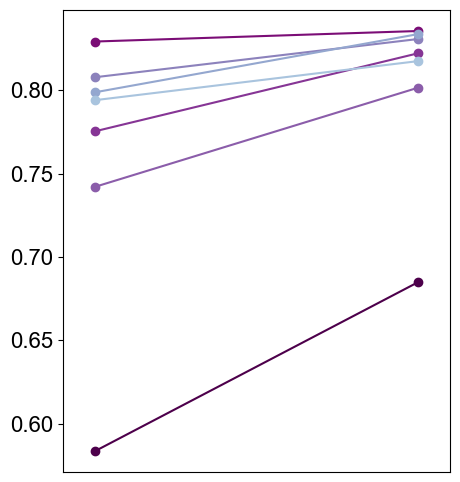

In [9]:
line_colors = generate_color_gradient(len(subjects)+3,modality)
fig, ax = plt.subplots(figsize=(5,6))
for i in range(len(subjects)):
    plt.plot(scores[i,[0,-1]].T,  markersize=12, marker = '.', color=line_colors[i])
    
ax.set_xticks([])
ax.set_xlim([-.1,1.1])
#ax.set_ylabel('$R^2$', fontsize=20)

plt.savefig(figdir + '/r2_total_group_' + modality + '_2way.pdf', dpi=300, transparent=True)

plt.show()

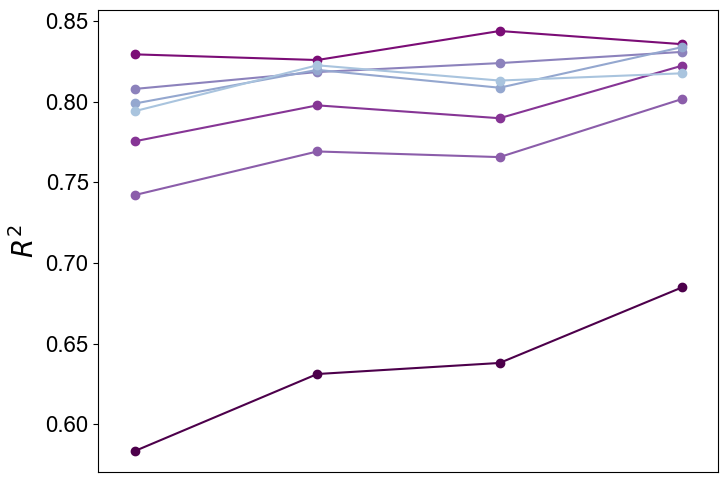

In [10]:
line_colors = generate_color_gradient(len(subjects)+3,modality)
fig, ax = plt.subplots(figsize=(8,6))

for i in range(len(subjects)):
    plt.plot(scores[i,:].T,  markersize=12, marker = '.', color=line_colors[i])
    
ax.set_xticks([])
ax.set_xlim([-.2,3.2])
ax.set_ylabel('$R^2$', fontsize=20)

plt.savefig(figdir + '/r2_total_group_' + modality + '_4way.pdf', dpi=300, transparent=True)

plt.show()

In [11]:
modality = 'fad'

In [12]:
scores = np.zeros([len(subjects),4])

for s in range(len(subjects)):
    
    subj = subjects[s]
    
    ytest = np.load(outdir + '/' + str(subj) + '_' + modality + '_ytest.npy')
    
    ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_nodelay_lin_ytest_hat.npy')
    scores[s,0] = r2_score(ytest, ytest_hat, multioutput = 'variance_weighted')
    
    ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_nodelay_nonlin_ytest_hat.npy')
    scores[s,1] = r2_score(ytest, ytest_hat, multioutput = 'variance_weighted')
    
    ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_delay_lin_ytest_hat.npy')
    scores[s,2] = r2_score(ytest, ytest_hat, multioutput = 'variance_weighted')
    
    ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_delay_nonlin_ytest_hat.npy')
    scores[s,3] = r2_score(ytest, ytest_hat, multioutput = 'variance_weighted')

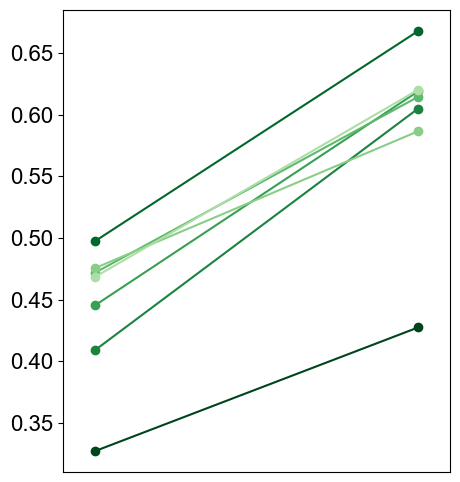

In [13]:
line_colors = generate_color_gradient(len(subjects)+3,modality)
fig, ax = plt.subplots(figsize=(5,6))
for i in range(len(subjects)):
    plt.plot(scores[i,[0,-1]].T,  markersize=12, marker = '.', color=line_colors[i])
    
ax.set_xticks([])
ax.set_xlim([-.1,1.1])
#ax.set_ylabel('$R^2$', fontsize=20)

plt.savefig(figdir + '/r2_total_group_' + modality + '_2way.pdf', dpi=300, transparent=True)

plt.show()

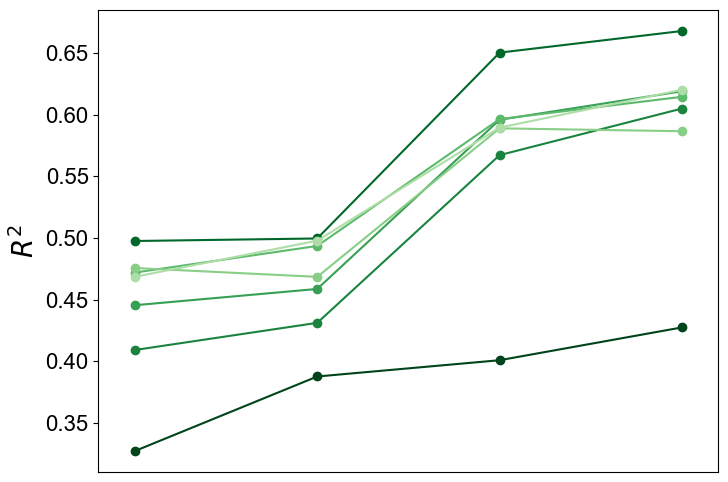

In [14]:
line_colors = generate_color_gradient(len(subjects)+3,modality)
fig, ax = plt.subplots(figsize=(8,6))

for i in range(len(subjects)):
    plt.plot(scores[i,:].T,  markersize=12, marker = '.', color=line_colors[i])
    
ax.set_xticks([])
ax.set_xlim([-.2,3.2])
ax.set_ylabel('$R^2$', fontsize=20)

plt.savefig(figdir + '/r2_total_group_' + modality + '_4way.pdf', dpi=300, transparent=True)

plt.show()

In [15]:
modality = 'hemo1'

In [16]:
scores = np.zeros([len(subjects),4])

for s in range(len(subjects)):
    
    subj = subjects[s]
    
    ytest = np.load(outdir + '/' + str(subj) + '_' + modality + '_ytest.npy')
    
    ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_nodelay_lin_ytest_hat.npy')
    scores[s,0] = r2_score(ytest, ytest_hat, multioutput = 'variance_weighted')
    
    ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_nodelay_nonlin_ytest_hat.npy')
    scores[s,1] = r2_score(ytest, ytest_hat, multioutput = 'variance_weighted')
    
    ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_delay_lin_ytest_hat.npy')
    scores[s,2] = r2_score(ytest, ytest_hat, multioutput = 'variance_weighted')
    
    ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_delay_nonlin_ytest_hat.npy')
    scores[s,3] = r2_score(ytest, ytest_hat, multioutput = 'variance_weighted')

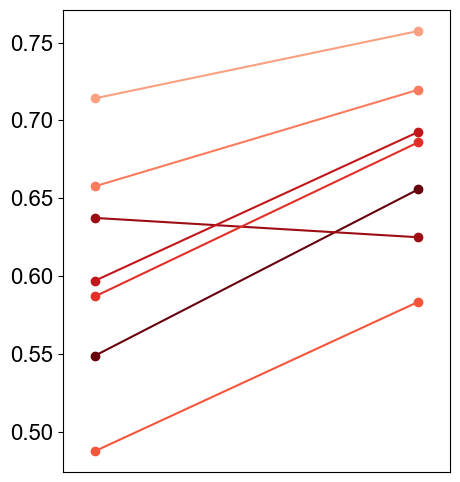

In [17]:
line_colors = generate_color_gradient(len(subjects)+3,modality)
fig, ax = plt.subplots(figsize=(5,6))
for i in range(len(subjects)):
    plt.plot(scores[i,[0,-1]].T,  markersize=12, marker = '.', color=line_colors[i])
    
ax.set_xticks([])
ax.set_xlim([-.1,1.1])
#ax.set_ylabel('$R^2$', fontsize=20)

plt.savefig(figdir + '/r2_total_group_' + modality + '_2way.pdf', dpi=300, transparent=True)

plt.show()

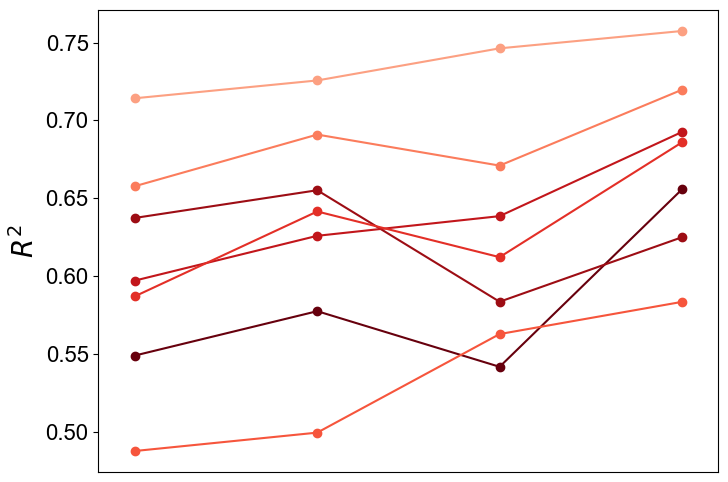

In [18]:
line_colors = generate_color_gradient(len(subjects)+3,modality)
fig, ax = plt.subplots(figsize=(8,6))

for i in range(len(subjects)):
    plt.plot(scores[i,:].T,  markersize=12, marker = '.', color=line_colors[i])
    
ax.set_xticks([])
ax.set_xlim([-.2,3.2])
ax.set_ylabel('$R^2$', fontsize=20)

plt.savefig(figdir + '/r2_total_group_' + modality + '_4way.pdf', dpi=300, transparent=True)

plt.show()

## PC analysis

In [19]:
modality = 'jrgeco'

In [20]:
scores = np.zeros([len(subjects),4])

for s in range(len(subjects)):
        
    subj = subjects[s]

    vh = np.load(outdir + '/../PCs/' + str(subj) + '_' + modality + '_spatial_modes.npy')

    ytest = np.load(outdir + '/' + str(subj) + '_' + modality + '_ytest.npy')

    ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_nodelay_lin_ytest_hat.npy')
    scores[s,0] = r2_score(ytest@vh.T[:,1:200], ytest_hat@vh.T[:,1:200], multioutput = 'variance_weighted')

    ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_nodelay_nonlin_ytest_hat.npy')
    scores[s,1] = r2_score(ytest@vh.T[:,1:200], ytest_hat@vh.T[:,1:200], multioutput = 'variance_weighted')

    ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_delay_lin_ytest_hat.npy')
    scores[s,2] = r2_score(ytest@vh.T[:,1:200], ytest_hat@vh.T[:,1:200], multioutput = 'variance_weighted')

    ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_delay_nonlin_ytest_hat.npy')
    scores[s,3] = r2_score(ytest@vh.T[:,1:200], ytest_hat@vh.T[:,1:200], multioutput = 'variance_weighted')

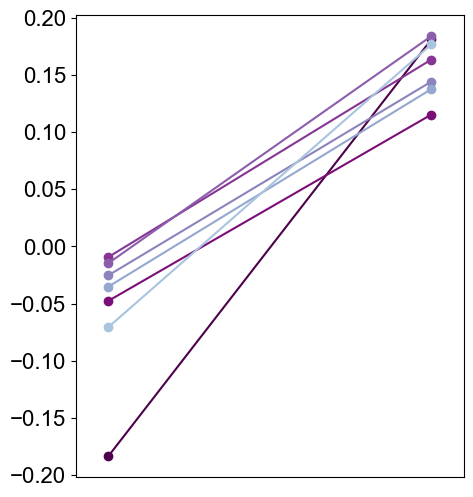

In [21]:
line_colors = generate_color_gradient(len(subjects)+3,modality)
fig, ax = plt.subplots(figsize=(5,6))
for i in range(len(subjects)):
    plt.plot(scores[i,[0,-1]].T,  markersize=12, marker = '.', color=line_colors[i])
    
ax.set_xticks([])
ax.set_xlim([-.1,1.1])
#ax.set_ylabel('$R^2$', fontsize=20)

plt.savefig(figdir + '/r2_PCs2-N_group_' + modality + '_2way.pdf', dpi=300, transparent=True)

plt.show()

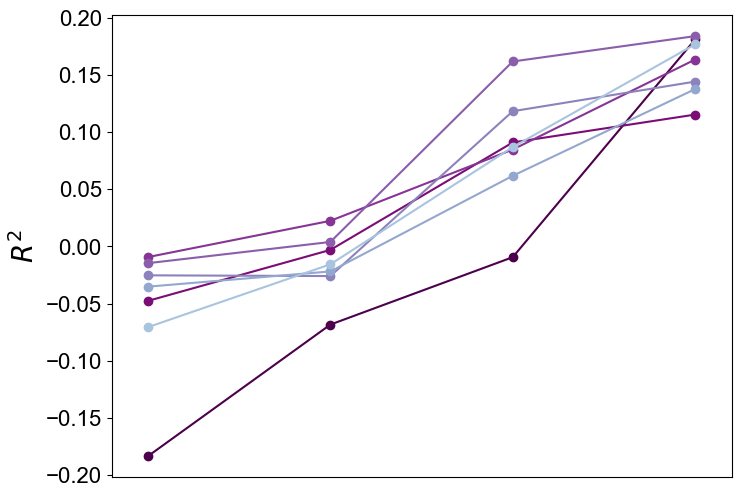

In [22]:
line_colors = generate_color_gradient(len(subjects)+3,modality)
fig, ax = plt.subplots(figsize=(8,6))

for i in range(len(subjects)):
    plt.plot(scores[i,:].T,  markersize=12, marker = '.', color=line_colors[i])
    
ax.set_xticks([])
ax.set_xlim([-.2,3.2])
ax.set_ylabel('$R^2$', fontsize=20)

plt.savefig(figdir + '/r2_PCs2-N_group_' + modality + '_4way.pdf', dpi=300, transparent=True)

plt.show()

In [23]:
scores = np.zeros([len(subjects),4,4])

for s in range(len(subjects)):
    
    tic()
    
    for pc in range(4):
    
        subj = subjects[s]
        
        vh = np.load(outdir + '/../PCs/' + str(subj) + '_' + modality + '_spatial_modes.npy')

        ytest = np.load(outdir + '/' + str(subj) + '_' + modality + '_ytest.npy')

        ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_nodelay_lin_ytest_hat.npy')
        scores[s,0,pc] = r2_score(ytest@vh.T[:,pc:pc+1], ytest_hat@vh.T[:,pc:pc+1])

        ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_nodelay_nonlin_ytest_hat.npy')
        scores[s,1,pc] = r2_score(ytest@vh.T[:,pc:pc+1], ytest_hat@vh.T[:,pc:pc+1])

        ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_delay_lin_ytest_hat.npy')
        scores[s,2,pc] = r2_score(ytest@vh.T[:,pc:pc+1], ytest_hat@vh.T[:,pc:pc+1])

        ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_delay_nonlin_ytest_hat.npy')
        scores[s,3,pc] = r2_score(ytest@vh.T[:,pc:pc+1], ytest_hat@vh.T[:,pc:pc+1])
        
    toc()

Elapsed time is 4.9572319984436035 seconds.
Elapsed time is 4.861048460006714 seconds.
Elapsed time is 5.006983041763306 seconds.
Elapsed time is 4.944514274597168 seconds.
Elapsed time is 5.0057032108306885 seconds.
Elapsed time is 5.0382184982299805 seconds.
Elapsed time is 5.001561880111694 seconds.


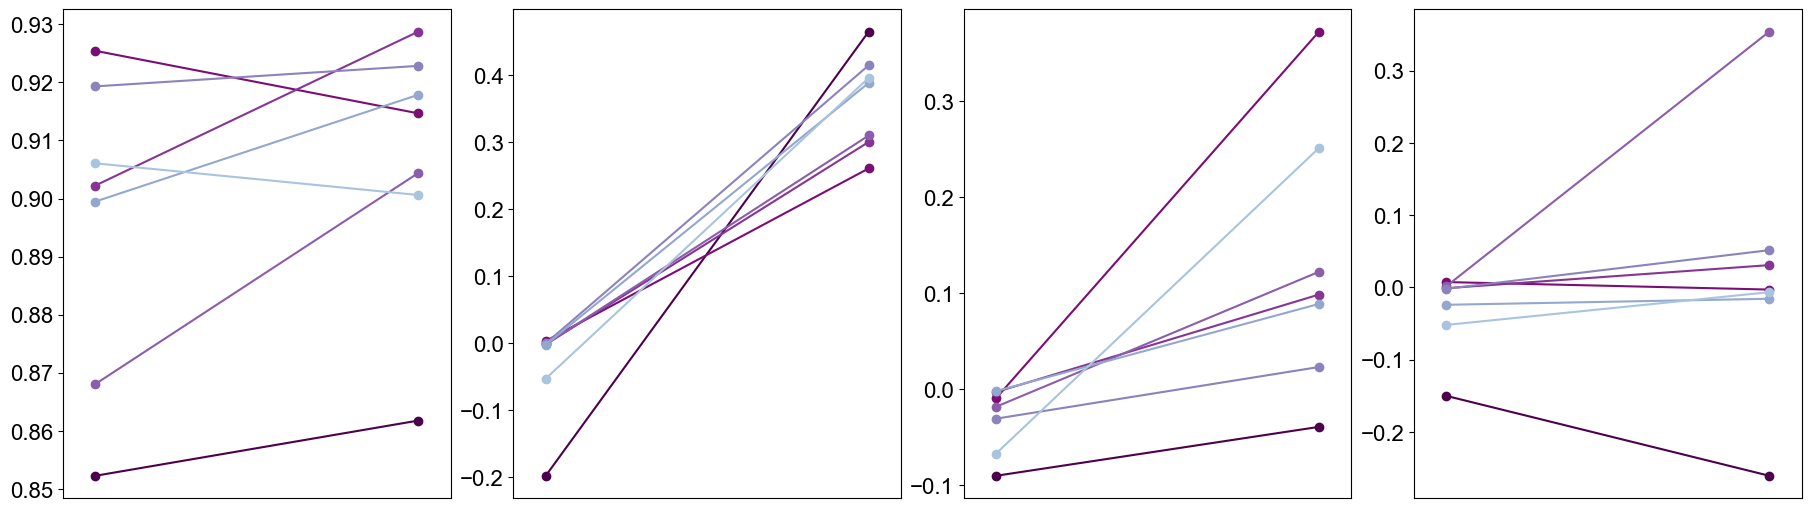

In [24]:
fig, axes = plt.subplots(1,4,sharex='col',figsize=(18,5),layout='compressed')

for pc in range(4):

    axes = axes.ravel()

    line_colors = generate_color_gradient(len(subjects)+3,modality)

    for i in range(len(subjects)):
        axes[pc].plot(scores[i,[0,-1],pc].T,  markersize=12, marker = '.', color=line_colors[i])

    axes[pc].set_xticks([])
    axes[pc].set_xlim([-.1,1.1])

plt.savefig(figdir + '/r2_PCs_group_' + modality + '.pdf', dpi=300, transparent=True)

plt.show()

## FAD

In [25]:
modality = 'fad'

In [26]:
scores = np.zeros([len(subjects),4])

for s in range(len(subjects)):
        
    subj = subjects[s]

    vh = np.load(outdir + '/../PCs/' + str(subj) + '_' + modality + '_spatial_modes.npy')

    ytest = np.load(outdir + '/' + str(subj) + '_' + modality + '_ytest.npy')

    ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_nodelay_lin_ytest_hat.npy')
    scores[s,0] = r2_score(ytest@vh.T[:,1:200], ytest_hat@vh.T[:,1:200], multioutput = 'variance_weighted')

    ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_nodelay_nonlin_ytest_hat.npy')
    scores[s,1] = r2_score(ytest@vh.T[:,1:200], ytest_hat@vh.T[:,1:200], multioutput = 'variance_weighted')

    ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_delay_lin_ytest_hat.npy')
    scores[s,2] = r2_score(ytest@vh.T[:,1:200], ytest_hat@vh.T[:,1:200], multioutput = 'variance_weighted')

    ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_delay_nonlin_ytest_hat.npy')
    scores[s,3] = r2_score(ytest@vh.T[:,1:200], ytest_hat@vh.T[:,1:200], multioutput = 'variance_weighted')

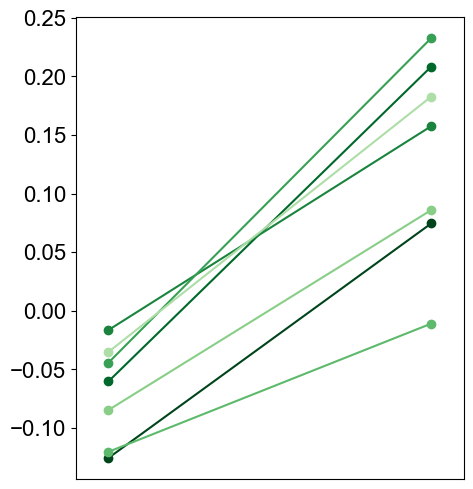

In [27]:
line_colors = generate_color_gradient(len(subjects)+3,modality)
fig, ax = plt.subplots(figsize=(5,6))
for i in range(len(subjects)):
    plt.plot(scores[i,[0,-1]].T,  markersize=12, marker = '.', color=line_colors[i])
    
ax.set_xticks([])
ax.set_xlim([-.1,1.1])
#ax.set_ylabel('$R^2$', fontsize=20)

plt.savefig(figdir + '/r2_PCs2-N_group_' + modality + '_2way.pdf', dpi=300, transparent=True)

plt.show()

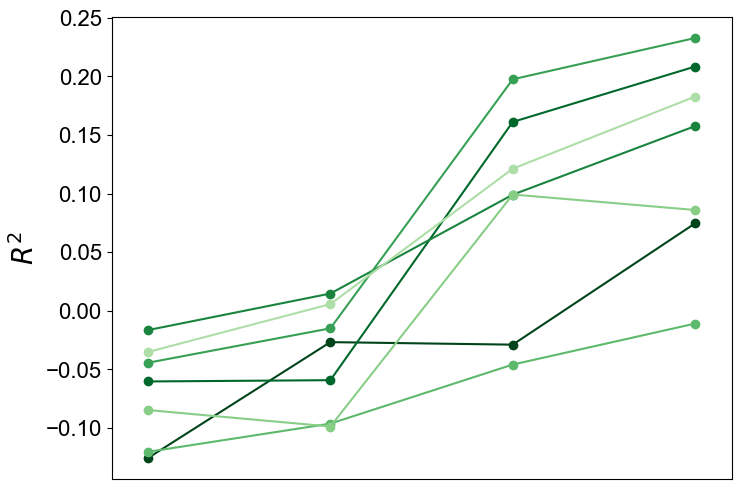

In [28]:
line_colors = generate_color_gradient(len(subjects)+3,modality)
fig, ax = plt.subplots(figsize=(8,6))

for i in range(len(subjects)):
    plt.plot(scores[i,:].T,  markersize=12, marker = '.', color=line_colors[i])
    
ax.set_xticks([])
ax.set_xlim([-.2,3.2])
ax.set_ylabel('$R^2$', fontsize=20)

plt.savefig(figdir + '/r2_PCs2-N_group_' + modality + '_4way.pdf', dpi=300, transparent=True)

plt.show()

In [29]:
scores = np.zeros([len(subjects),4,4])

for s in range(len(subjects)):
    
    tic()
    
    for pc in range(4):
    
        subj = subjects[s]
        
        vh = np.load(outdir + '/../PCs/' + str(subj) + '_' + modality + '_spatial_modes.npy')

        ytest = np.load(outdir + '/' + str(subj) + '_' + modality + '_ytest.npy')

        ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_nodelay_lin_ytest_hat.npy')
        scores[s,0,pc] = r2_score(ytest@vh.T[:,pc:pc+1], ytest_hat@vh.T[:,pc:pc+1], multioutput = 'variance_weighted')

        ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_nodelay_nonlin_ytest_hat.npy')
        scores[s,1,pc] = r2_score(ytest@vh.T[:,pc:pc+1], ytest_hat@vh.T[:,pc:pc+1], multioutput = 'variance_weighted')

        ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_delay_lin_ytest_hat.npy')
        scores[s,2,pc] = r2_score(ytest@vh.T[:,pc:pc+1], ytest_hat@vh.T[:,pc:pc+1], multioutput = 'variance_weighted')

        ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_delay_nonlin_ytest_hat.npy')
        scores[s,3,pc] = r2_score(ytest@vh.T[:,pc:pc+1], ytest_hat@vh.T[:,pc:pc+1], multioutput = 'variance_weighted')
        
    toc()

Elapsed time is 5.044236660003662 seconds.
Elapsed time is 5.01518177986145 seconds.
Elapsed time is 4.940890789031982 seconds.
Elapsed time is 4.97339940071106 seconds.
Elapsed time is 4.996999979019165 seconds.
Elapsed time is 5.079025983810425 seconds.
Elapsed time is 4.9556519985198975 seconds.


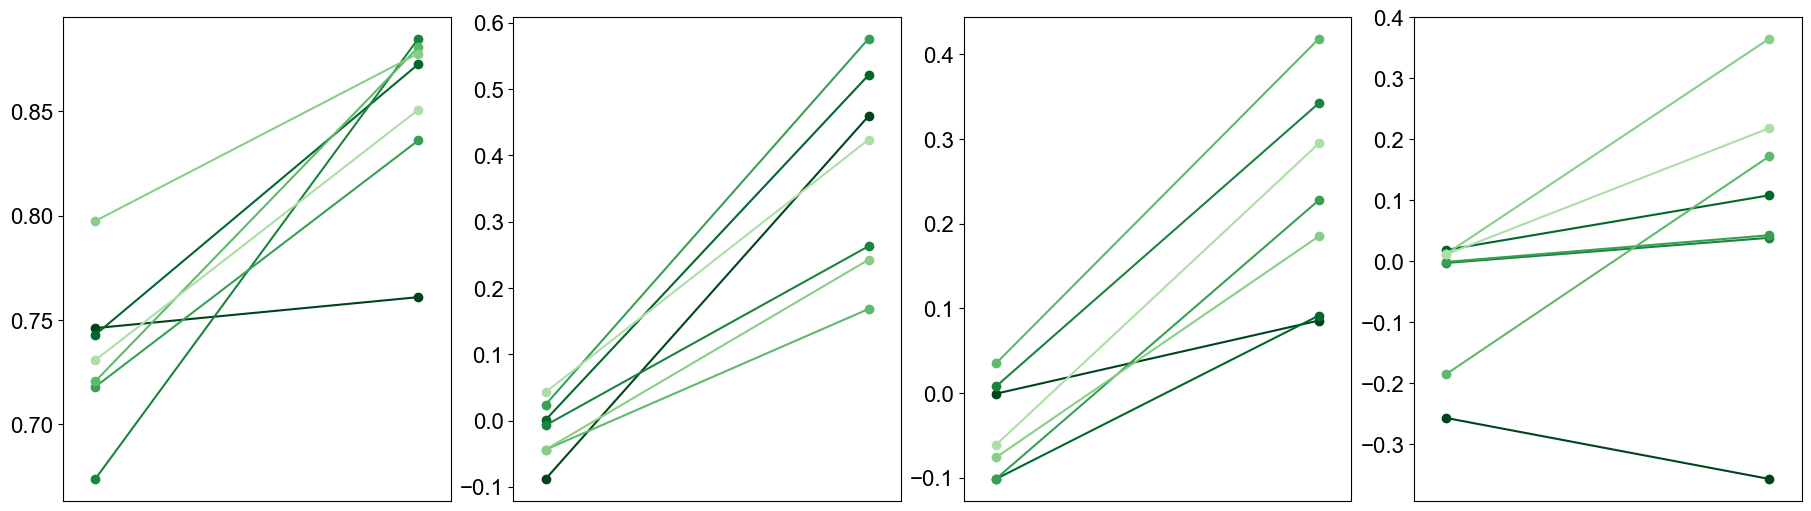

In [30]:
fig, axes = plt.subplots(1,4,sharex='col',figsize=(18,5),layout='compressed')

for pc in range(4):

    axes = axes.ravel()

    line_colors = generate_color_gradient(len(subjects)+3,modality)

    for i in range(len(subjects)):
        axes[pc].plot(scores[i,[0,-1],pc].T,  markersize=12, marker = '.', color=line_colors[i])

    axes[pc].set_xticks([])
    axes[pc].set_xlim([-.1,1.1])

plt.savefig(figdir + '/r2_PCs_group_' + modality + '.pdf', dpi=300, transparent=True)

plt.show()

## Hemo

In [31]:
modality = 'hemo1'

In [32]:
scores = np.zeros([len(subjects),4])

for s in range(len(subjects)):
        
    subj = subjects[s]

    vh = np.load(outdir + '/../PCs/' + str(subj) + '_' + modality + '_spatial_modes.npy')

    ytest = np.load(outdir + '/' + str(subj) + '_' + modality + '_ytest.npy')

    ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_nodelay_lin_ytest_hat.npy')
    scores[s,0] = r2_score(ytest@vh.T[:,1:200], ytest_hat@vh.T[:,1:200], multioutput = 'variance_weighted')

    ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_nodelay_nonlin_ytest_hat.npy')
    scores[s,1] = r2_score(ytest@vh.T[:,1:200], ytest_hat@vh.T[:,1:200], multioutput = 'variance_weighted')

    ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_delay_lin_ytest_hat.npy')
    scores[s,2] = r2_score(ytest@vh.T[:,1:200], ytest_hat@vh.T[:,1:200], multioutput = 'variance_weighted')

    ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_delay_nonlin_ytest_hat.npy')
    scores[s,3] = r2_score(ytest@vh.T[:,1:200], ytest_hat@vh.T[:,1:200], multioutput = 'variance_weighted')

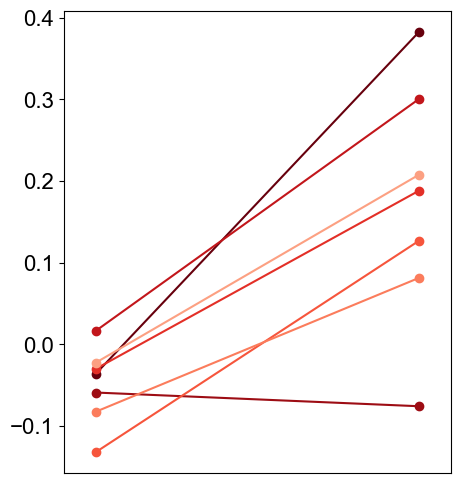

In [33]:
line_colors = generate_color_gradient(len(subjects)+3,modality)
fig, ax = plt.subplots(figsize=(5,6))
for i in range(len(subjects)):
    plt.plot(scores[i,[0,-1]].T,  markersize=12, marker = '.', color=line_colors[i])
    
ax.set_xticks([])
ax.set_xlim([-.1,1.1])
#ax.set_ylabel('$R^2$', fontsize=20)

plt.savefig(figdir + '/r2_PCs2-N_group_' + modality + '_2way.pdf', dpi=300, transparent=True)

plt.show()

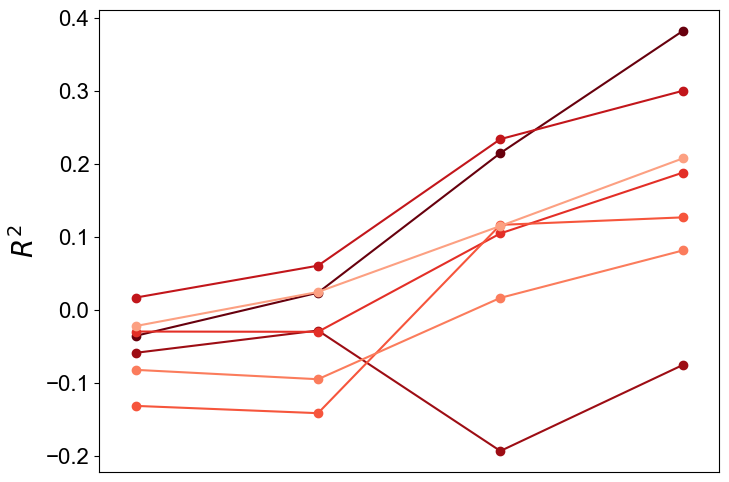

In [34]:
line_colors = generate_color_gradient(len(subjects)+3,modality)
fig, ax = plt.subplots(figsize=(8,6))

for i in range(len(subjects)):
    plt.plot(scores[i,:].T,  markersize=12, marker = '.', color=line_colors[i])
    
ax.set_xticks([])
ax.set_xlim([-.2,3.2])
ax.set_ylabel('$R^2$', fontsize=20)

plt.savefig(figdir + '/r2_PCs2-N_group_' + modality + '_4way.pdf', dpi=300, transparent=True)

plt.show()

In [35]:
scores = np.zeros([len(subjects),4,4])

for s in range(len(subjects)):
    
    tic()
    
    for pc in range(4):
    
        subj = subjects[s]
        
        vh = np.load(outdir + '/../PCs/' + str(subj) + '_' + modality + '_spatial_modes.npy')

        ytest = np.load(outdir + '/' + str(subj) + '_' + modality + '_ytest.npy')

        ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_nodelay_lin_ytest_hat.npy')
        scores[s,0,pc] = r2_score(ytest@vh.T[:,pc:pc+1], ytest_hat@vh.T[:,pc:pc+1], multioutput = 'variance_weighted')

        ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_nodelay_nonlin_ytest_hat.npy')
        scores[s,1,pc] = r2_score(ytest@vh.T[:,pc:pc+1], ytest_hat@vh.T[:,pc:pc+1], multioutput = 'variance_weighted')

        ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_delay_lin_ytest_hat.npy')
        scores[s,2,pc] = r2_score(ytest@vh.T[:,pc:pc+1], ytest_hat@vh.T[:,pc:pc+1], multioutput = 'variance_weighted')

        ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_delay_nonlin_ytest_hat.npy')
        scores[s,3,pc] = r2_score(ytest@vh.T[:,pc:pc+1], ytest_hat@vh.T[:,pc:pc+1], multioutput = 'variance_weighted')
        
    toc()

Elapsed time is 5.026620388031006 seconds.
Elapsed time is 5.044018983840942 seconds.
Elapsed time is 5.069363594055176 seconds.
Elapsed time is 5.096798658370972 seconds.
Elapsed time is 5.109813690185547 seconds.
Elapsed time is 4.966508150100708 seconds.
Elapsed time is 5.066913604736328 seconds.


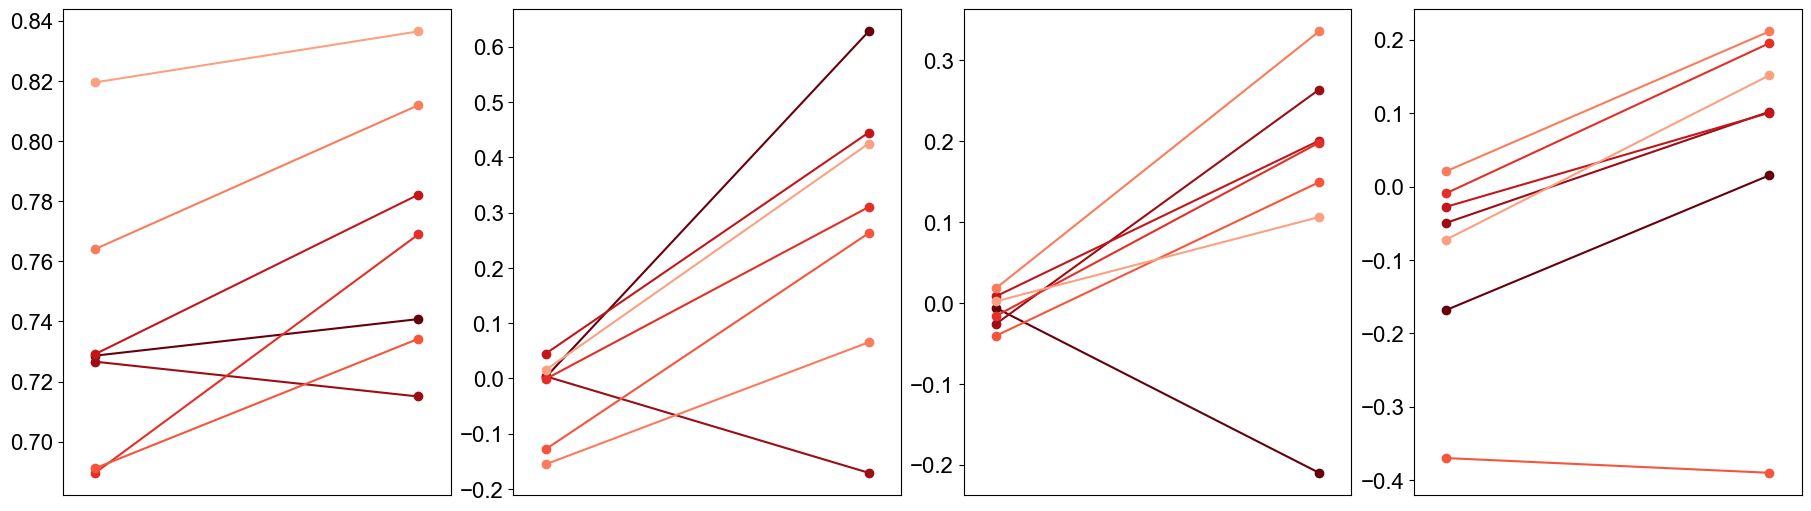

In [36]:
fig, axes = plt.subplots(1,4,sharex='col',figsize=(18,5),layout='compressed')

for pc in range(4):

    axes = axes.ravel()

    line_colors = generate_color_gradient(len(subjects)+3,modality)

    for i in range(len(subjects)):
        axes[pc].plot(scores[i,[0,-1],pc].T,  markersize=12, marker = '.', color=line_colors[i])

    axes[pc].set_xticks([])
    axes[pc].set_xlim([-.1,1.1])

plt.savefig(figdir + '/r2_PCs_group_' + modality + '.pdf', dpi=300, transparent=True)

plt.show()

# PC time series plots

In [37]:
def load_pupil(subj,filt=True):
    data_dict = mat73.loadmat(data_dir + '/' + str(subj) + '_pupil.mat')
    pupil = data_dict['pupil'].reshape(-1,1)
    pupil = medfilt(pupil,21)
    
    if filt:
        Fs = 20
        dt = 1/Fs
        sos = signal.butter(1, [.01,.2],btype = 'bandpass', output = 'sos', fs = Fs)
        pupil = signal.sosfiltfilt(sos, pupil, axis=0)
    
    pupil = pupil[1000:-800,:]
    
    pupil = StandardScaler(with_std=False).fit_transform(pupil)

    return pupil

## Mouse 7

In [38]:
s=6
modality = 'jrgeco'
subj = subjects[s]
lags = np.load(outdir + '/group_jrgeco_lags.npy').tolist()
lag = lags[s]
vh = np.load(outdir + '/../PCs/' + str(subj) + '_' + modality + '_spatial_modes.npy')
pupil = load_pupil(subj)
ytest = np.load(outdir + '/' + str(subj) + '_' + modality + '_ytest.npy')
ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_delay_nonlin_ytest_hat.npy')

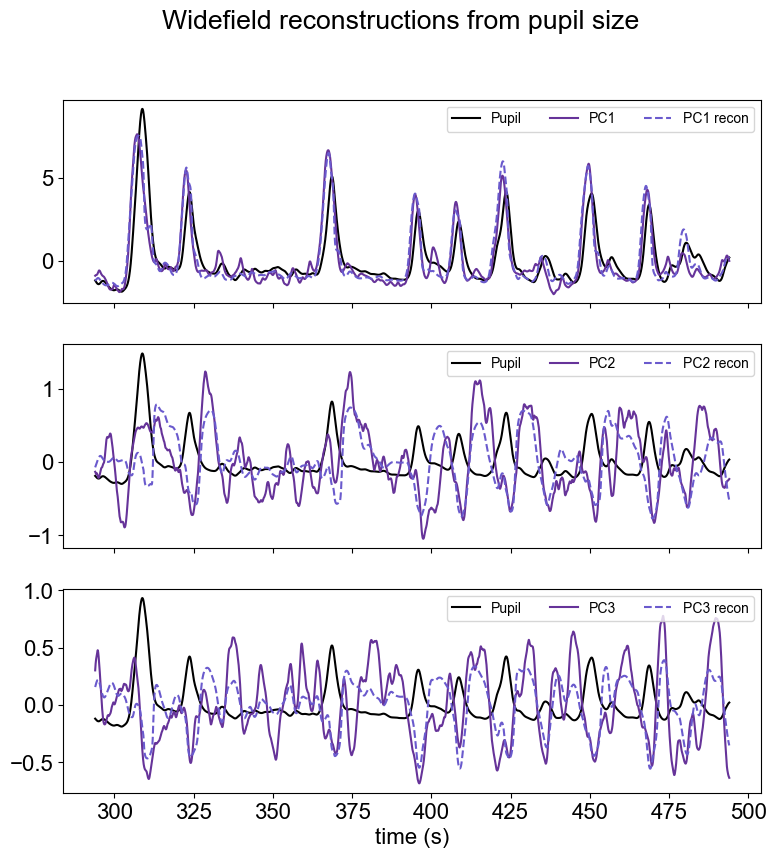

0.9006084459240995
0.3958550090075956
0.2511439412870815


In [39]:
fig, axes = plt.subplots(3,1,sharex='col',figsize=(9,9))

dt = .05
t = np.linspace(0,ytest.shape[0]*dt,ytest.shape[0])
plt.xlabel("time (s)")

pupil_plot = pupil[-ytest.shape[0]-lag:-lag]
pupil_plot = (1/np.max(pupil_plot))*pupil_plot

y_plot = ytest@(vh.T[:,:5])
yhat_plot = ytest_hat@(vh.T[:,:5])

start = -4000
stop = len(ytest)

label_loc = 'upper right'

t = t[start:stop]
pupil_plot = pupil_plot[start:stop,:]
y_plot = y_plot[start:stop,:]
yhat_plot = yhat_plot[start:stop,:]

ax = 0
axes[ax].plot(t,1.2*np.max(np.abs(y_plot[:,ax]))*pupil_plot,'k', label="Pupil")
axes[ax].plot(t,y_plot[:,ax],color='rebeccapurple',label="PC1")
axes[ax].plot(t,yhat_plot[:,ax],'slateblue',linestyle='dashed',label="PC1 recon")
axes[ax].legend(loc=label_loc,ncol=3,fontsize=10)
    
ax = 1
axes[ax].plot(t,1.2*np.max(y_plot[:,ax])*pupil_plot,'k',label="Pupil")
axes[ax].plot(t,y_plot[:,ax],'rebeccapurple',label="PC2")
axes[ax].plot(t,yhat_plot[:,ax],'slateblue',linestyle='dashed',label="PC2 recon")
axes[ax].legend(loc=label_loc,ncol=3,fontsize=10)

ax = 2
axes[ax].plot(t,1.2*np.max(y_plot[:,ax])*pupil_plot,'k',label="Pupil")
axes[ax].plot(t,y_plot[:,ax],'rebeccapurple',label="PC3")
axes[ax].plot(t,yhat_plot[:,ax],'slateblue',linestyle='dashed',label="PC3 recon")
axes[ax].legend(loc=label_loc,ncol=3,fontsize=10)

plt.suptitle('Widefield reconstructions from pupil size')

plt.savefig(figdir + '/PC_timeseries_mouse' + str(subj) + '.pdf', dpi=300, transparent=True)

plt.show()

for i in range(3):
    print(str(r2_score(ytest@vh.T[:,i],(ytest_hat@vh.T[:,i]))))

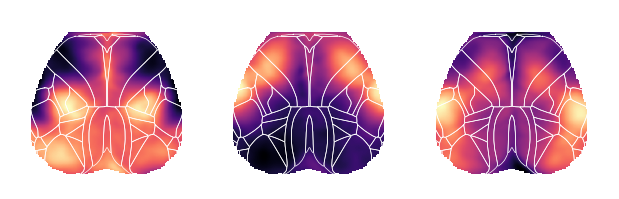

In [40]:
# Visualize components

temp = np.zeros((16384,1), dtype=np.single)
spatial_modes = vh.T

fig, axes = plt.subplots(1,3,sharex='col',figsize=(9.42,1.88),layout='compressed')

axes = axes.flatten()
for i, ax in enumerate(axes):
    temp = np.zeros((16384,1), dtype=np.single)
    temp[mask_long] = spatial_modes[:,i].reshape(-1,1)
    temp = np.ma.masked_where(temp==0, temp)
    temp = temp.reshape(128,128,order='F')
    im = ax.imshow(temp, cmap = 'magma')
    plot_allen(ax)
    ax.axis('off')
    
plt.savefig(figdir + '/PC_maps_mouse' + str(subj) + '.pdf', dpi=300, transparent=True)

plt.show()

## Mouse 3

In [41]:
s=3
modality = 'jrgeco'
subj = subjects[s]
lags = np.load(outdir + '/group_jrgeco_lags.npy').tolist()
lag = lags[s]
vh = np.load(outdir + '/../PCs/' + str(subj) + '_' + modality + '_spatial_modes.npy')
pupil = load_pupil(subj)
ytest = np.load(outdir + '/' + str(subj) + '_' + modality + '_ytest.npy')
ytest_hat = np.load(outdir + '/' + str(subj) + '_' + modality + '_delay_nonlin_ytest_hat.npy')

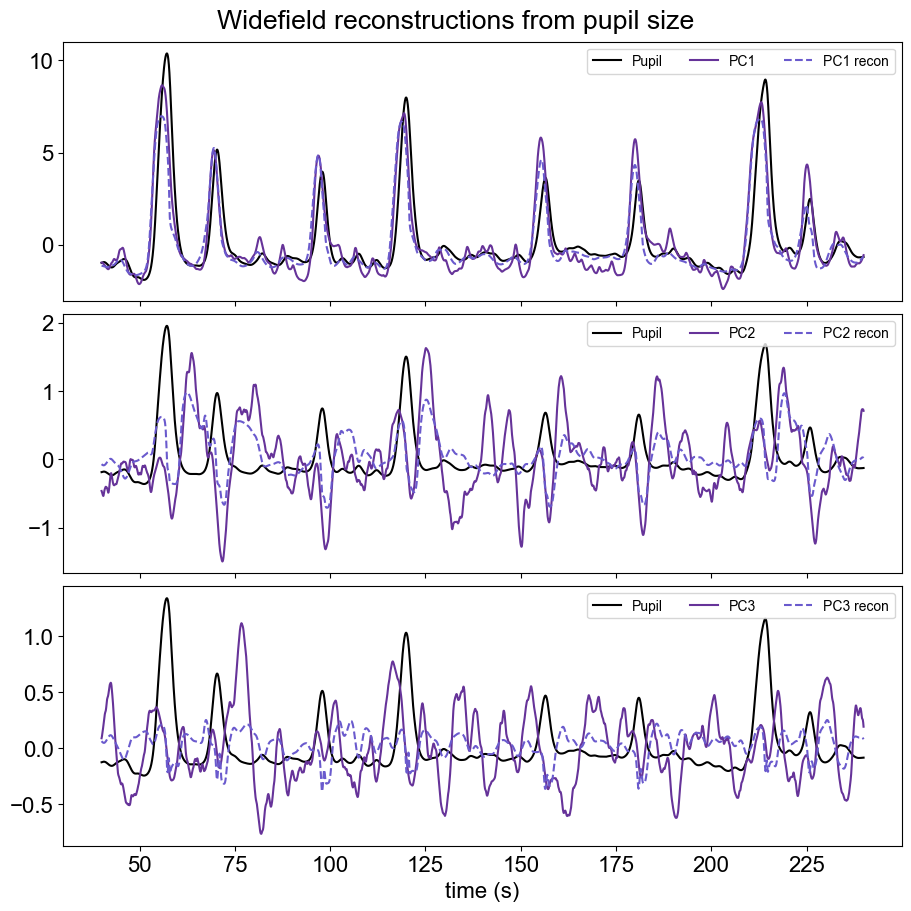

0.9044105643568975
0.30981969589455693
0.12209313174472247


In [42]:
fig, axes = plt.subplots(3,1,sharex='col',figsize=(9,9),layout='compressed')

dt = .05
t = np.linspace(0,ytest.shape[0]*dt,ytest.shape[0])
plt.xlabel("time (s)")

pupil_plot = pupil[-ytest.shape[0]-lag:-lag]
pupil_plot = (1/np.max(pupil_plot))*pupil_plot

y_plot = ytest@(vh.T[:,:5])
yhat_plot = ytest_hat@(vh.T[:,:5])

start = 800
stop = start+4000

label_loc = 'upper right'

t = t[start:stop]
pupil_plot = pupil_plot[start:stop,:]
y_plot = y_plot[start:stop,:]
yhat_plot = yhat_plot[start:stop,:]

ax = 0
axes[ax].plot(t,1.2*np.max(np.abs(y_plot[:,ax]))*pupil_plot,'k', label="Pupil")
axes[ax].plot(t,y_plot[:,ax],color='rebeccapurple',label="PC1")
axes[ax].plot(t,yhat_plot[:,ax],'slateblue',linestyle='dashed',label="PC1 recon")
axes[ax].legend(loc=label_loc,ncol=3,fontsize=10)
    
ax = 1
axes[ax].plot(t,1.2*np.max(y_plot[:,ax])*pupil_plot,'k',label="Pupil")
axes[ax].plot(t,y_plot[:,ax],'rebeccapurple',label="PC2")
axes[ax].plot(t,yhat_plot[:,ax],'slateblue',linestyle='dashed',label="PC2 recon")
axes[ax].legend(loc=label_loc,ncol=3,fontsize=10)

ax = 2
axes[ax].plot(t,1.2*np.max(y_plot[:,ax])*pupil_plot,'k',label="Pupil")
axes[ax].plot(t,y_plot[:,ax],'rebeccapurple',label="PC3")
axes[ax].plot(t,yhat_plot[:,ax],'slateblue',linestyle='dashed',label="PC3 recon")
axes[ax].legend(loc=label_loc,ncol=3,fontsize=10)

plt.suptitle('Widefield reconstructions from pupil size')

#plt.savefig(figdir + '/PC_timeseries_mouse' + str(subj) + '.pdf', dpi=300, transparent=True)

plt.show()

for i in range(3):
    print(str(r2_score(ytest@vh.T[:,i],(ytest_hat@vh.T[:,i]))))

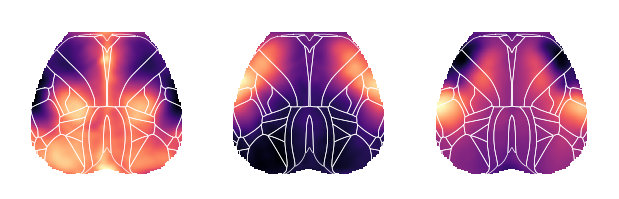

In [43]:
# Visualize components

temp = np.zeros((16384,1), dtype=np.single)
spatial_modes = vh.T

fig, axes = plt.subplots(1,3,sharex='col',figsize=(9.42,1.88),layout='compressed')

axes = axes.flatten()
for i, ax in enumerate(axes):
    temp = np.zeros((16384,1), dtype=np.single)
    temp[mask_long] = spatial_modes[:,i].reshape(-1,1)
    temp = np.ma.masked_where(temp==0, temp)
    temp = temp.reshape(128,128,order='F')
    im = ax.imshow(temp, cmap = 'magma')
    plot_allen(ax)
    ax.axis('off')
    
plt.savefig(figdir + '/PC_maps_mouse' + str(subj) + '.pdf', dpi=300, transparent=True)

plt.show()

# R2 maps

In [44]:
modality = 'jrgeco'

In [45]:
maps = np.zeros((ytest.shape[1],len(subjects),3))

for s in range(len(subjects)):
    
    tic()
    
    subj = subjects[s]
    vh = np.load(outdir + '/../PCs/' + str(subj) + '_' + modality + '_spatial_modes.npy')
    ytest = np.load(outdir + '/' + str(subj) + '_' + modality + '_ytest.npy')
    ytest_hat1 = np.load(outdir + '/' + str(subj) + '_' + modality + '_nodelay_lin_ytest_hat.npy')
    ytest_hat2 = np.load(outdir + '/' + str(subj) + '_' + modality + '_delay_nonlin_ytest_hat.npy')
    
    maps[:,s,0] = r2_score(ytest, ytest_hat1, multioutput='raw_values')
    maps[:,s,1] = r2_score(ytest, ytest_hat2, multioutput='raw_values')
    maps[:,s,2] = maps[:,s,1]-maps[:,s,0]
    
    toc()

Elapsed time is 2.5350160598754883 seconds.
Elapsed time is 2.509666681289673 seconds.
Elapsed time is 2.534749984741211 seconds.
Elapsed time is 2.5368192195892334 seconds.
Elapsed time is 2.5365426540374756 seconds.
Elapsed time is 2.543531894683838 seconds.
Elapsed time is 2.540919065475464 seconds.


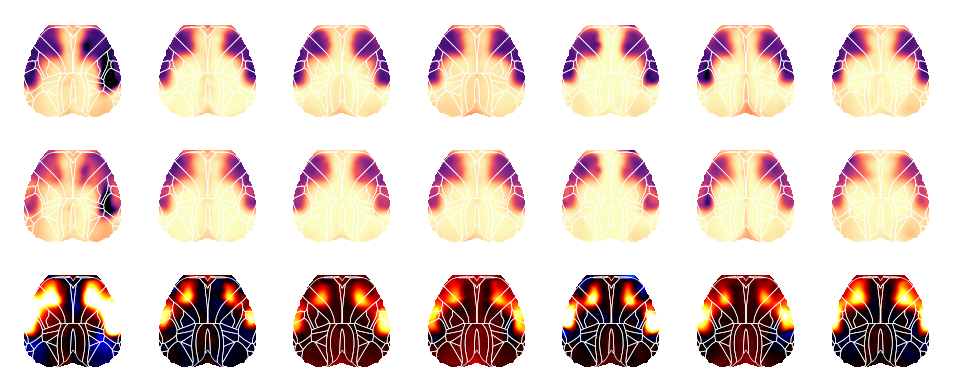

In [46]:
fig, axes = plt.subplots(3,7,sharex='col',figsize=(9.42,4),layout='compressed')

c1 = .4
c2 = .9
axes = axes.flatten()

for i, ax in enumerate(axes):
    temp = np.zeros((16384,1), dtype=np.single)
    temp[mask_long] = maps[:,np.mod(i,7),i//7].reshape(-1,1)
    temp = np.ma.masked_where(temp==0, temp)
    temp = temp.reshape(128,128,order='F')
    
    if i//7==2:
        im = ax.imshow(temp, vmin=-c1, vmax=c1, cmap = cold_hot)
    else:
        im = ax.imshow(temp, vmin=-.3, vmax=c2, cmap = 'magma')
        
#     if np.mod(i,len(subjects))==len(subjects)-1:
#         cbar=plt.colorbar(im, ax=ax, aspect=10, shrink=.7)
#         cbar.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
#         cbar.ax.yaxis.set_tick_params(labelsize=10)
        
    plot_allen(ax)
    ax.axis('off')
    
plt.savefig(figdir + '/r2_maps_' + modality + '.pdf', dpi=300, transparent=True)

plt.show()

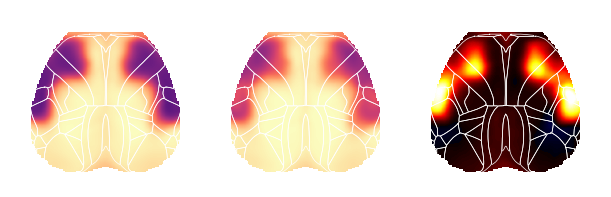

In [47]:
fig, axes = plt.subplots(1,3,figsize=(6,4),layout='compressed')

c1=.4
c2=.9

outmat1 = np.zeros([16384,1], dtype=np.single)
outmat1[mask_long] = np.mean(maps[:,:,0],axis=1,keepdims=1)
outmat1 = np.ma.masked_where(outmat1==0, outmat1)
outmat1 = outmat1.reshape(128,128,order='F')
    
axes[0].imshow(outmat1, vmin=-c1, vmax=c2, cmap='magma')

outmat1 = np.zeros([16384,1], dtype=np.single)
outmat1[mask_long] = np.mean(maps[:,:,1],axis=1,keepdims=1)
outmat1 = np.ma.masked_where(outmat1==0, outmat1)
outmat1 = outmat1.reshape(128,128,order='F')
    
axes[1].imshow(outmat1, vmin=-c1, vmax=c2, cmap='magma')

outmat1 = np.zeros([16384,1], dtype=np.single)
outmat1[mask_long] = np.mean(maps[:,:,2],axis=1,keepdims=1)
outmat1 = np.ma.masked_where(outmat1==0, outmat1)
outmat1 = outmat1.reshape(128,128,order='F')
    
axes[2].imshow(outmat1, vmin=-c1, vmax=c1, cmap=cold_hot)

plot_allen(axes[0])
plot_allen(axes[1])
plot_allen(axes[2])

axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')

plt.axis('off')

plt.savefig(figdir + '/r2_maps_' + modality + '_grpavg.pdf', dpi=300, transparent=True)

plt.show()

In [48]:
modality = 'fad'

In [49]:
maps = np.zeros((ytest.shape[1],len(subjects),3))

for s in range(len(subjects)):
    
    tic()
    
    subj = subjects[s]
    vh = np.load(outdir + '/../PCs/' + str(subj) + '_' + modality + '_spatial_modes.npy')
    ytest = np.load(outdir + '/' + str(subj) + '_' + modality + '_ytest.npy')
    ytest_hat1 = np.load(outdir + '/' + str(subj) + '_' + modality + '_nodelay_lin_ytest_hat.npy')
    ytest_hat2 = np.load(outdir + '/' + str(subj) + '_' + modality + '_delay_nonlin_ytest_hat.npy')
    
    maps[:,s,0] = r2_score(ytest, ytest_hat1, multioutput='raw_values')
    maps[:,s,1] = r2_score(ytest, ytest_hat2, multioutput='raw_values')
    maps[:,s,2] = maps[:,s,1]-maps[:,s,0]
    
    toc()

Elapsed time is 2.559307813644409 seconds.
Elapsed time is 2.53108286857605 seconds.
Elapsed time is 2.5308125019073486 seconds.
Elapsed time is 2.5301990509033203 seconds.
Elapsed time is 2.5361599922180176 seconds.
Elapsed time is 2.5123322010040283 seconds.
Elapsed time is 2.507199764251709 seconds.


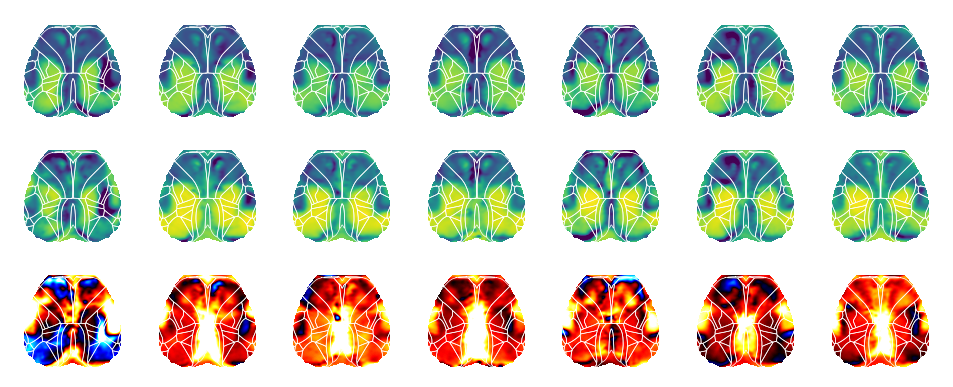

In [50]:
fig, axes = plt.subplots(3,7,sharex='col',figsize=(9.42,4),layout='compressed')

c1 = .4
c2 = .9
axes = axes.flatten()

for i, ax in enumerate(axes):
    temp = np.zeros((16384,1), dtype=np.single)
    temp[mask_long] = maps[:,np.mod(i,7),i//7].reshape(-1,1)
    temp = np.ma.masked_where(temp==0, temp)
    temp = temp.reshape(128,128,order='F')
    
    if i//7==2:
        im = ax.imshow(temp, vmin=-c1, vmax=c1, cmap = cold_hot)
    else:
        im = ax.imshow(temp, vmin=-.3, vmax=c2, cmap = 'viridis')
        
#     if np.mod(i,len(subjects))==len(subjects)-1:
#         cbar=plt.colorbar(im, ax=ax, aspect=10, shrink=.7)
#         cbar.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
#         cbar.ax.yaxis.set_tick_params(labelsize=10)
        
    plot_allen(ax)
    ax.axis('off')
    
plt.savefig(figdir + '/r2_maps_' + modality + '.pdf', dpi=300, transparent=True)

plt.show()

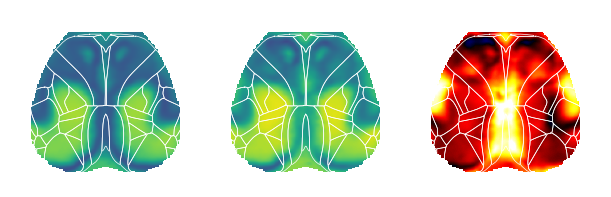

In [51]:
fig, axes = plt.subplots(1,3,figsize=(6,4),layout='compressed')

c1=.4
c2=.9

outmat1 = np.zeros([16384,1], dtype=np.single)
outmat1[mask_long] = np.mean(maps[:,:,0],axis=1,keepdims=1)
outmat1 = np.ma.masked_where(outmat1==0, outmat1)
outmat1 = outmat1.reshape(128,128,order='F')
    
axes[0].imshow(outmat1, vmin=-c1, vmax=c2, cmap='viridis')

outmat1 = np.zeros([16384,1], dtype=np.single)
outmat1[mask_long] = np.mean(maps[:,:,1],axis=1,keepdims=1)
outmat1 = np.ma.masked_where(outmat1==0, outmat1)
outmat1 = outmat1.reshape(128,128,order='F')
    
axes[1].imshow(outmat1, vmin=-c1, vmax=c2, cmap='viridis')

outmat1 = np.zeros([16384,1], dtype=np.single)
outmat1[mask_long] = np.mean(maps[:,:,2],axis=1,keepdims=1)
outmat1 = np.ma.masked_where(outmat1==0, outmat1)
outmat1 = outmat1.reshape(128,128,order='F')
    
axes[2].imshow(outmat1, vmin=-c1, vmax=c1, cmap=cold_hot)

plot_allen(axes[0])
plot_allen(axes[1])
plot_allen(axes[2])

axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')

plt.axis('off')

plt.savefig(figdir + '/r2_maps_' + modality + '_grpavg.pdf', dpi=300, transparent=True)

plt.show()

In [52]:
modality = 'hemo1'

In [53]:
maps = np.zeros((ytest.shape[1],len(subjects),3))

for s in range(len(subjects)):
    
    tic()
    
    subj = subjects[s]
    vh = np.load(outdir + '/../PCs/' + str(subj) + '_' + modality + '_spatial_modes.npy')
    ytest = np.load(outdir + '/' + str(subj) + '_' + modality + '_ytest.npy')
    ytest_hat1 = np.load(outdir + '/' + str(subj) + '_' + modality + '_nodelay_lin_ytest_hat.npy')
    ytest_hat2 = np.load(outdir + '/' + str(subj) + '_' + modality + '_delay_nonlin_ytest_hat.npy')
    
    maps[:,s,0] = r2_score(ytest, ytest_hat1, multioutput='raw_values')
    maps[:,s,1] = r2_score(ytest, ytest_hat2, multioutput='raw_values')
    maps[:,s,2] = maps[:,s,1]-maps[:,s,0]
    
    toc()

Elapsed time is 2.5311243534088135 seconds.
Elapsed time is 2.526895046234131 seconds.
Elapsed time is 2.5370028018951416 seconds.
Elapsed time is 2.525937795639038 seconds.
Elapsed time is 2.538090467453003 seconds.
Elapsed time is 2.5225119590759277 seconds.
Elapsed time is 2.5282082557678223 seconds.


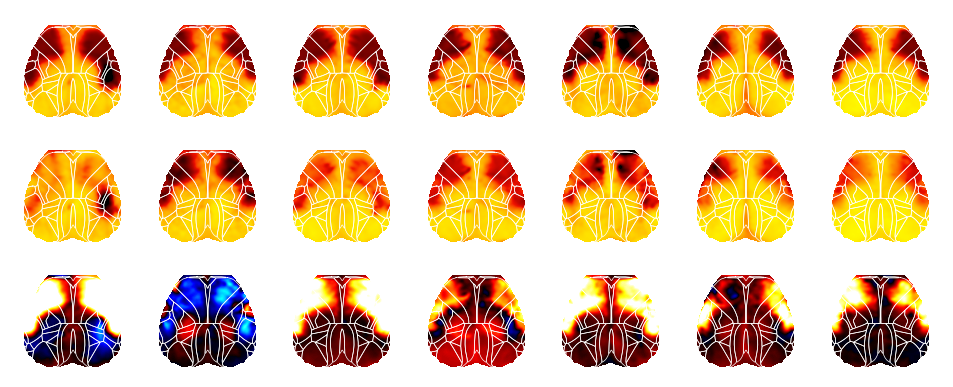

In [54]:
fig, axes = plt.subplots(3,7,sharex='col',figsize=(9.42,4),layout='compressed')

c1 = .4
c2 = .9
axes = axes.flatten()

for i, ax in enumerate(axes):
    temp = np.zeros((16384,1), dtype=np.single)
    temp[mask_long] = maps[:,np.mod(i,7),i//7].reshape(-1,1)
    temp = np.ma.masked_where(temp==0, temp)
    temp = temp.reshape(128,128,order='F')
    
    if i//7==2:
        im = ax.imshow(temp, vmin=-c1, vmax=c1, cmap = cold_hot)
    else:
        im = ax.imshow(temp, vmin=-.3, vmax=c2, cmap = cc.cm.CET_L4)
        
#     if np.mod(i,len(subjects))==len(subjects)-1:
#         cbar=plt.colorbar(im, ax=ax, aspect=10, shrink=.7)
#         cbar.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
#         cbar.ax.yaxis.set_tick_params(labelsize=10)
        
    plot_allen(ax)
    ax.axis('off')
    
plt.savefig(figdir + '/r2_maps_' + modality + '.pdf', dpi=300, transparent=True)

plt.show()

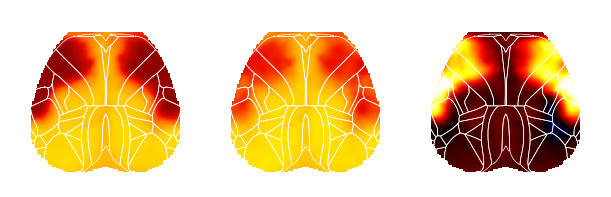

In [55]:
fig, axes = plt.subplots(1,3,figsize=(6,4),layout='compressed')

c1=.4
c2=.9

outmat1 = np.zeros([16384,1], dtype=np.single)
outmat1[mask_long] = np.mean(maps[:,:,0],axis=1,keepdims=1)
outmat1 = np.ma.masked_where(outmat1==0, outmat1)
outmat1 = outmat1.reshape(128,128,order='F')
    
axes[0].imshow(outmat1, vmin=-c1, vmax=c2, cmap=cc.cm.CET_L4)

outmat1 = np.zeros([16384,1], dtype=np.single)
outmat1[mask_long] = np.mean(maps[:,:,1],axis=1,keepdims=1)
outmat1 = np.ma.masked_where(outmat1==0, outmat1)
outmat1 = outmat1.reshape(128,128,order='F')
    
axes[1].imshow(outmat1, vmin=-c1, vmax=c2, cmap=cc.cm.CET_L4)

outmat1 = np.zeros([16384,1], dtype=np.single)
outmat1[mask_long] = np.mean(maps[:,:,2],axis=1,keepdims=1)
outmat1 = np.ma.masked_where(outmat1==0, outmat1)
outmat1 = outmat1.reshape(128,128,order='F')
    
axes[2].imshow(outmat1, vmin=-c1, vmax=c1, cmap=cold_hot)

plot_allen(axes[0])
plot_allen(axes[1])
plot_allen(axes[2])

axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')

plt.axis('off')

plt.savefig(figdir + '/r2_maps_' + modality + '_grpavg.pdf', dpi=300, transparent=True)

plt.show()